In [ ]:
# crime pattern analysis

Index(['Sl. No. Col. (1)', 'City Col. (2)',
       'Crime Against Women - Related Acts - The Dowry Prohibition Act, 1961 - I - Col. (3)',
       'Crime Against Women - Related Acts - The Dowry Prohibition Act, 1961 - V - Col. (4)',
       'Crime Against Women - Related Acts - The Dowry Prohibition Act, 1961 - R - Col. (5)',
       'Crime Against Women - Related Acts - The Immoral Traffic Prevention Act, 1956 - I - Col. (6)',
       'Crime Against Women - Related Acts - The Immoral Traffic Prevention Act, 1956 - V - Col. (7)',
       'Crime Against Women - Related Acts - The Immoral Traffic Prevention Act, 1956 - R - Col. (8)',
       'Crime Against Women - Related Acts - The Protection of Women from Domestic Violence Act, 2005 - I - Col. (9)',
       'Crime Against Women - Related Acts - The Protection of Women from Domestic Violence Act, 2005 - V - Col. (10)',
       ...
       'Other Regulatory & Enforcement - Acts - Other State Local Acts - R - Col. (205)',
       'Other Regulatory 

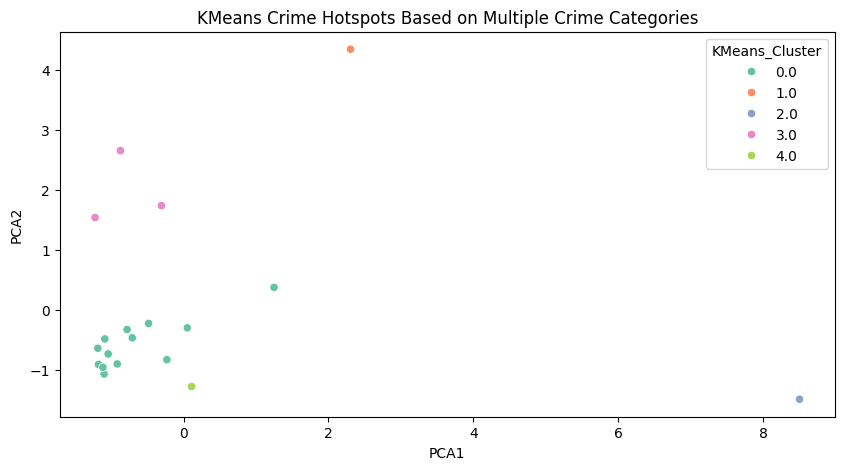

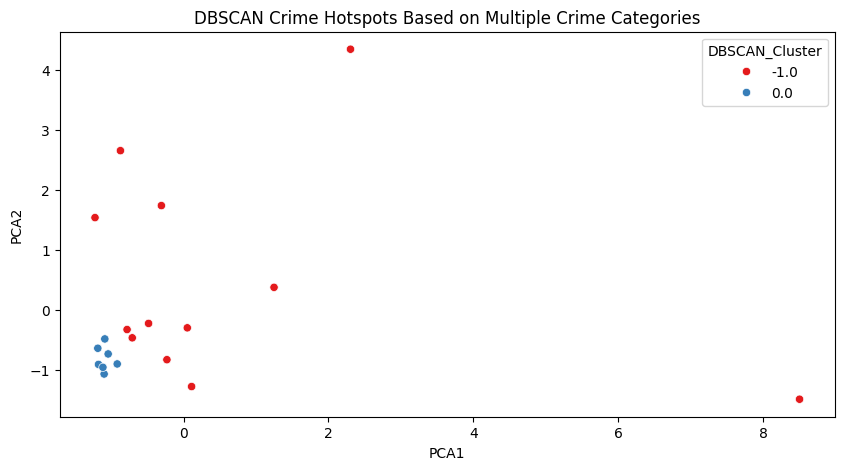


Cities in KMeans Hotspot Cluster 3.0:
Ahmedabad (Gujarat)
Kochi (Kerala)
Surat (Gujarat)

Cities in KMeans Hotspot Cluster 2.0:
Bengaluru (Karnataka)

Cities in KMeans Hotspot Cluster 1.0:
Chennai (Tamil Nadu)

Cities in KMeans Hotspot Cluster 0.0:
Coimbatore (Tamil Nadu)
Delhi City
Ghaziabad (Uttar Pradesh)
Hyderabad (Telangana)
Indore (Madhya Pradesh)
Jaipur (Rajasthan)
Kanpur (Uttar Pradesh)
Kolkata (West Bengal)
Kozhikode (Kerala)
Lucknow (Uttar Pradesh)
Mumbai (Maharashtra)
Nagpur (Maharashtra)
Pune (Maharashtra)

Cities in KMeans Hotspot Cluster 4.0:
Patna (Bihar)

Cities in DBSCAN Hotspot Cluster -1.0:
Ahmedabad (Gujarat)
Bengaluru (Karnataka)
Chennai (Tamil Nadu)
Coimbatore (Tamil Nadu)
Delhi City
Hyderabad (Telangana)
Indore (Madhya Pradesh)
Kochi (Kerala)
Mumbai (Maharashtra)
Nagpur (Maharashtra)
Patna (Bihar)
Surat (Gujarat)

Cities in DBSCAN Hotspot Cluster 0.0:
Ghaziabad (Uttar Pradesh)
Jaipur (Rajasthan)
Kanpur (Uttar Pradesh)
Kolkata (West Bengal)
Kozhikode (Kerala)
Luc

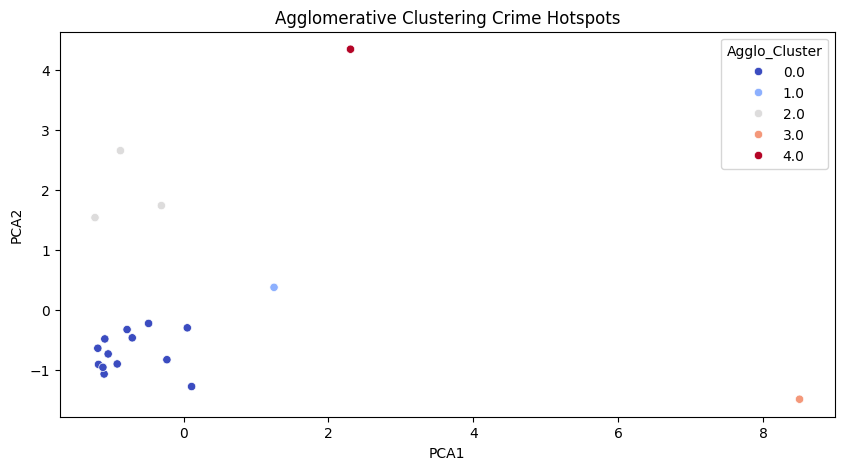

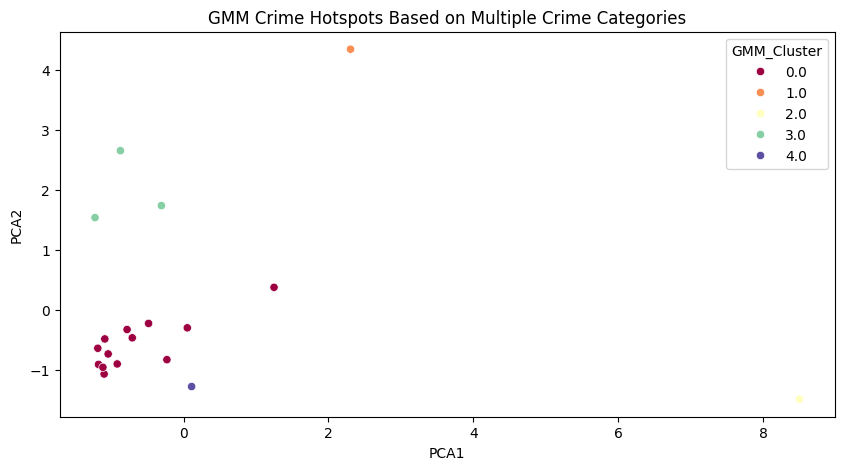


Cities in Agglomerative Cluster 2.0:
Ahmedabad (Gujarat)
Kochi (Kerala)
Surat (Gujarat)

Cities in Agglomerative Cluster 3.0:
Bengaluru (Karnataka)

Cities in Agglomerative Cluster 4.0:
Chennai (Tamil Nadu)

Cities in Agglomerative Cluster 1.0:
Coimbatore (Tamil Nadu)

Cities in Agglomerative Cluster 0.0:
Delhi City
Ghaziabad (Uttar Pradesh)
Hyderabad (Telangana)
Indore (Madhya Pradesh)
Jaipur (Rajasthan)
Kanpur (Uttar Pradesh)
Kolkata (West Bengal)
Kozhikode (Kerala)
Lucknow (Uttar Pradesh)
Mumbai (Maharashtra)
Nagpur (Maharashtra)
Patna (Bihar)
Pune (Maharashtra)

Cities in GMM Cluster 3.0:
Ahmedabad (Gujarat)
Kochi (Kerala)
Surat (Gujarat)

Cities in GMM Cluster 2.0:
Bengaluru (Karnataka)

Cities in GMM Cluster 1.0:
Chennai (Tamil Nadu)

Cities in GMM Cluster 0.0:
Coimbatore (Tamil Nadu)
Delhi City
Ghaziabad (Uttar Pradesh)
Hyderabad (Telangana)
Indore (Madhya Pradesh)
Jaipur (Rajasthan)
Kanpur (Uttar Pradesh)
Kolkata (West Bengal)
Kozhikode (Kerala)
Lucknow (Uttar Pradesh)
Mumbai 

<ipython-input-5-54742e9db031>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Silhouette Score', data=scores_df, palette='Set2')


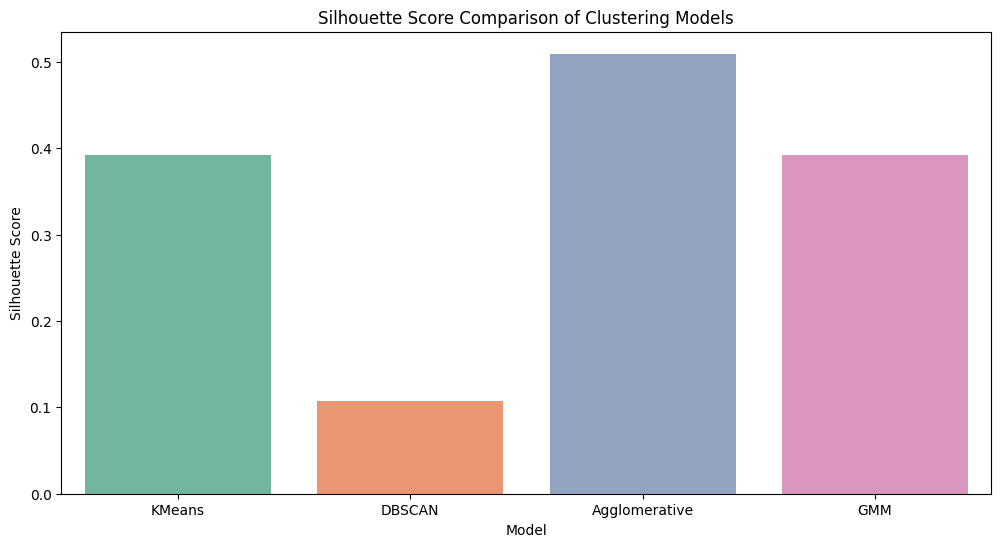

<ipython-input-5-54742e9db031>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Davies-Bouldin Index', data=scores_df, palette='Set1')


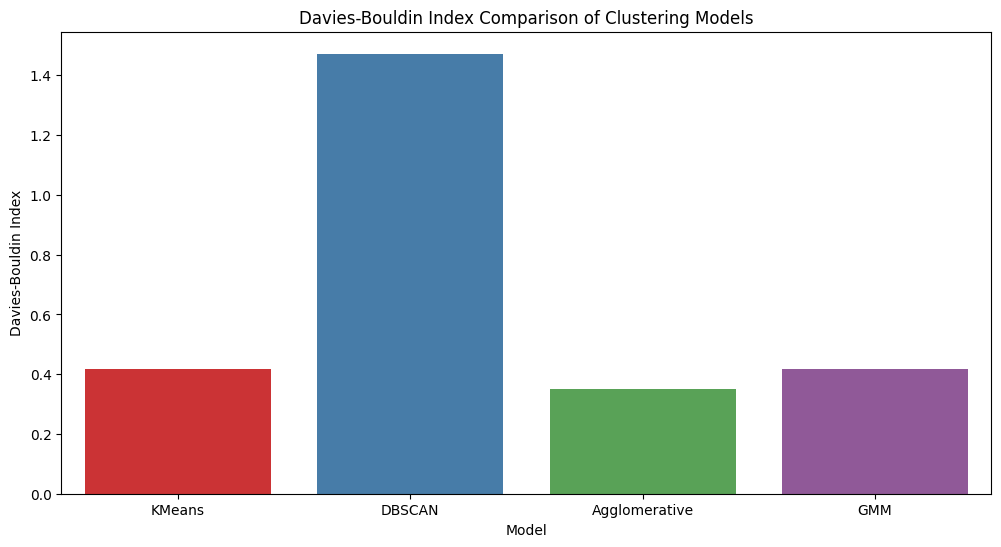

<ipython-input-5-54742e9db031>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Calinski-Harabasz Score', data=scores_df, palette='coolwarm')


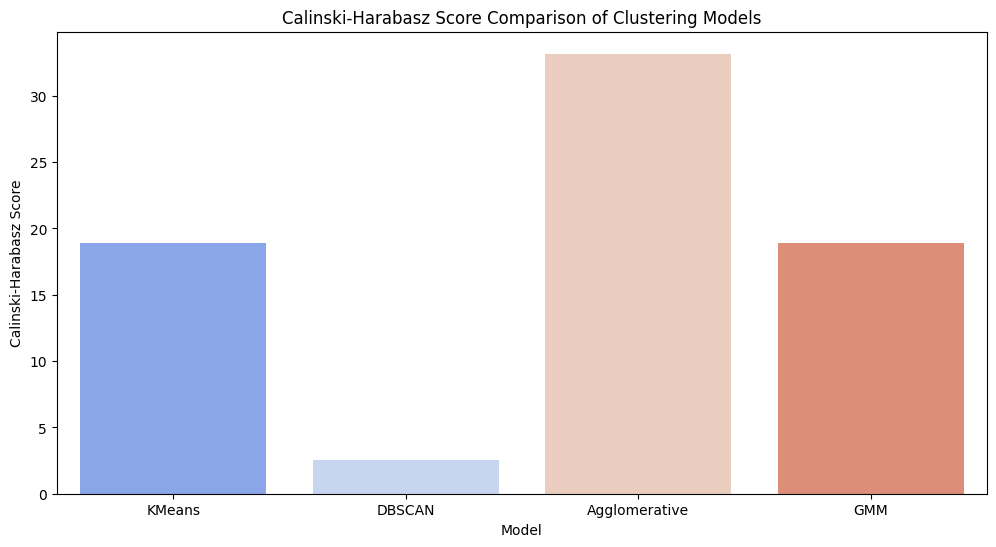

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
df = pd.read_csv('/content/NCRB-2021_Table_1B.5.csv', encoding='latin1')
print(df.columns)
df = df.drop(index=19)
df = df.reset_index(drop=True)
print(df.head())
columns_to_use = [
    'Crime Against Women - Related Acts - The Dowry Prohibition Act, 1961 - I - Col. (3)',
    'Crime Against Women - Related Acts - The Dowry Prohibition Act, 1961 - V - Col. (4)',
    'Crime Against Women - Related Acts - The Dowry Prohibition Act, 1961 - R - Col. (5)',
    'Crime Against Women - Related Acts - The Immoral Traffic Prevention Act, 1956 - I - Col. (6)',
    'Crime Against Women - Related Acts - The Immoral Traffic Prevention Act, 1956 - V - Col. (7)',
    'Crime Against Women - Related Acts - The Immoral Traffic Prevention Act, 1956 - R - Col. (8)',
    'Total Cognizable SLL Crimes - I - Col. (212)',
    'Total Cognizable SLL Crimes - V - Col. (213)',
    'Total Cognizable SLL Crimes - R - Col. (214)'
]
data = df[columns_to_use].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df.loc[data.index, 'KMeans_Cluster'] = kmeans_labels

#DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)
df.loc[data.index, 'DBSCAN_Cluster'] = db_labels
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df.loc[data.index, 'PCA1'] = pca_data[:, 0]
df.loc[data.index, 'PCA2'] = pca_data[:, 1]
# Plot KMeans Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set2')
plt.title("KMeans Crime Hotspots Based on Multiple Crime Categories")
plt.show()
# Plot DBSCAN Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set1')
plt.title("DBSCAN Crime Hotspots Based on Multiple Crime Categories")
plt.show()
df['City'] = df['City Col. (2)']
for cluster in df['KMeans_Cluster'].unique():
    print(f"\nCities in KMeans Hotspot Cluster {cluster}:")
    cities_in_cluster = df[df['KMeans_Cluster'] == cluster]['City']
    print(*cities_in_cluster.tolist(), sep='\n')


for cluster in df['DBSCAN_Cluster'].unique():
    print(f"\nCities in DBSCAN Hotspot Cluster {cluster}:")
    cities_in_cluster = df[df['DBSCAN_Cluster'] == cluster]['City']
    print(*cities_in_cluster.tolist(), sep='\n')

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(scaled_data)
df.loc[data.index, 'Agglo_Cluster'] = agglo_labels

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)
df.loc[data.index, 'GMM_Cluster'] = gmm_labels

# Plot Agglomerative Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Agglo_Cluster', palette='coolwarm')
plt.title("Agglomerative Clustering Crime Hotspots")
plt.show()

# Plot GMM Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='GMM_Cluster', palette='Spectral')
plt.title("GMM Crime Hotspots Based on Multiple Crime Categories")
plt.show()

# Display cities per cluster
for cluster in df['Agglo_Cluster'].unique():
    print(f"\nCities in Agglomerative Cluster {cluster}:")
    print(*df[df['Agglo_Cluster'] == cluster]['City'].tolist(), sep='\n')

for cluster in df['GMM_Cluster'].unique():
    print(f"\nCities in GMM Cluster {cluster}:")
    print(*df[df['GMM_Cluster'] == cluster]['City'].tolist(), sep='\n')


def evaluate_clustering(data, labels, name):
    silhouette = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    return {
        'Model': name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Score': ch_score
    }

# Evaluate each model
scores = [
    evaluate_clustering(scaled_data, kmeans_labels, 'KMeans'),
    evaluate_clustering(scaled_data, db_labels, 'DBSCAN'),
    evaluate_clustering(scaled_data, agglo_labels, 'Agglomerative'),
    evaluate_clustering(scaled_data, gmm_labels, 'GMM')
]

# Turn into DataFrame for comparison
scores_df = pd.DataFrame(scores)
print(scores_df)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Silhouette Score', data=scores_df, palette='Set2')
plt.title('Silhouette Score Comparison of Clustering Models')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Davies-Bouldin Index', data=scores_df, palette='Set1')
plt.title('Davies-Bouldin Index Comparison of Clustering Models')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Calinski-Harabasz Score', data=scores_df, palette='coolwarm')
plt.title('Calinski-Harabasz Score Comparison of Clustering Models')
plt.show()